# Association Rule Mining Project
> ## Submitted by : SAUMYA GUPTA - 18csu195

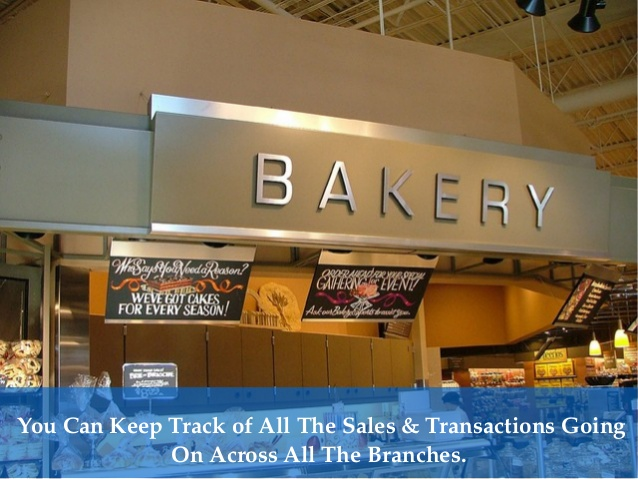

## BAKERY DATASET

## Description :

**This dataset contains over 15,000 observations**

- Date:
    Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 30/10/2016 to 09/04/2017.
    
    
- Time:
    Categorical variable that tells us the time of the transactions (HH:MM:SS format).
    
    
- Transactions:
    Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction, that's why the data set has less transactions than observations.
    
    
- Item:
    Categorical variable with the products.

## STEPS :

1. Perform Data Pre-processing and Data Visualization on the data set to get understanding of the data. 


2. Association Rule Mining
 
 >a.) Apriori Algorithm
  
 >b.) FP Growth algorithm
 
3. Analysis

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
data=pd.read_csv("bakery.csv")

In [3]:
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


## DATA  PREPROCESSING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [5]:
data.shape

(21293, 4)

In [6]:
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

**There are no null values in the dataset**

In [7]:
data.loc[data['Item']=='NONE',:].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [8]:
data=data.drop(data.loc[data['Item']=='NONE'].index)

In [9]:
data.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [10]:
items=data['Item'].unique()
n_items=pd.DataFrame(items)
n_items

,0
0,Bread
1,Scandinavian
2,Hot chocolate
3,Jam
4,Cookies
...,...
89,Gift voucher
90,Cherry me Dried fruit
91,Mortimer
92,Raw bars


In [11]:
basket = (
    # group data (item name should be grouped in order to unstack later)
    data.groupby([
        'Transaction', 'Item'
    ])['Transaction'].sum()  # Agregate quantity data just to apply unstack, the value doesnt change
    .unstack().reset_index()  # Transform to 1 transaction per row
    .fillna(0)  # fill the products that its not in the order with 0
    .set_index('Transaction')  # set the order number as index
)

print("One order per row with the quantity of each product")
basket.head()

One order per row with the quantity of each product


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
basket_boolean_set = basket.applymap(lambda quantity: 1 if int(quantity) >= 1 else 0)

print("Converted quantity to boolean values")
basket_boolean_set.head()

Converted quantity to boolean values


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## DATA EXPLORATION

In [13]:
#To check the occurrence of top 10 items in the dataset
data['Item'].value_counts().iloc[:10]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

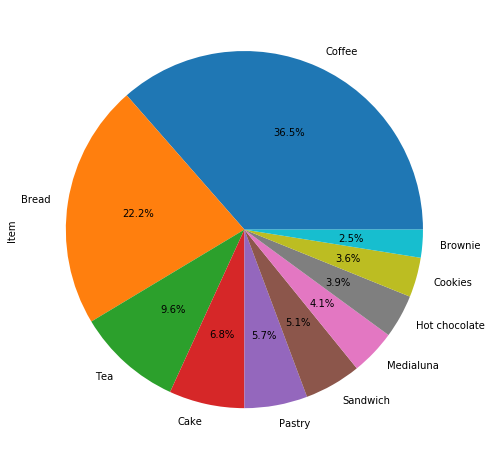

In [14]:
# Pie Chart
plt.figure(1, figsize=(8,10))
data['Item'].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.show()

**INFERENCE :**

>*Coffee is the most occurrent item in the dataset followed by bread and tea*

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


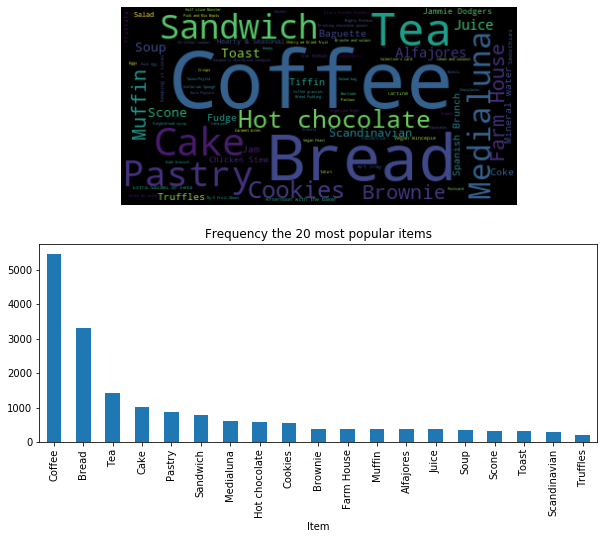

In [16]:
from wordcloud import WordCloud
fig, axes=plt.subplots(nrows=2, figsize=(10,8))
#WordCloud Graph
items_dict=data.groupby('Item')['Item'].count().sort_values(ascending=False).to_dict()
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=items_dict)
axes[0].imshow(wordcloud, interpolation="bilinear")
axes[0].axis("off")
data.groupby('Item')['Item'].count().sort_values(ascending=False)[0:19].plot.bar(ax=axes[1])
plt.title('Frequency the 20 most popular items')
plt.show()


Maxiumum numbers of teas sold: 20
Maxiumum numbers of coffees sold: 72


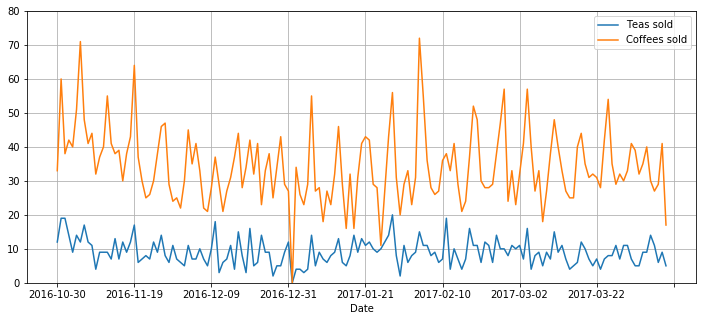

In [17]:
#plot showing the preferences for TEA and COFFEE
TC = data.groupby("Date")["Item"].apply(lambda x: x[x=="Tea"].count()).rename("Teas sold").to_frame()
TC["Coffees sold"] = data.groupby("Date")["Item"].apply(lambda x: x[x=="Coffee"].count())

TC.plot(figsize=(12,5))
plt.ylim([0,80])
plt.grid(True)
plt.legend()

print("Maxiumum numbers of teas sold: " + str(TC["Teas sold"].max()))
print("Maxiumum numbers of coffees sold: " + str(TC["Coffees sold"].max()))

**INFERENCE**
> *This shows that teas are always more preferred as compared to teas in 2016 and 2017*

[Text(0, 0, '1 / 2017'),
 Text(0, 0, '2 / 2017'),
 Text(0, 0, '3 / 2017'),
 Text(0, 0, '4 / 2017'),
 Text(0, 0, '10 / 2016'),
 Text(0, 0, '11 / 2016'),
 Text(0, 0, '12 / 2016')]

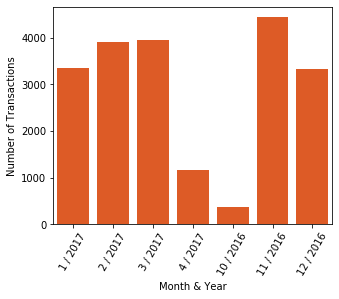

In [18]:
#SALES OVER TIME
month_year=data.copy()  
month_year['Date']=pd.to_datetime(month_year['Date'])
month_year['Month'],month_year['Year']=month_year['Date'].dt.month,month_year['Date'].dt.year

grp_month_year=month_year.groupby(['Month','Year'])['Transaction'].count().reset_index()
grp_month_year['Period'] = grp_month_year.Month.astype(str).str.cat(grp_month_year.Year.astype(str), sep=' / ')

#plot graph for months of the year 2016,2017
fig,axis=plt.subplots(figsize=(5,4))
axis=sns.barplot(data=grp_month_year,x='Period',y='Transaction',color = ("#FC4E07"))
axis.set_xlabel('Month & Year')
axis.set_ylabel('Number of Transactions')
axis.set_xticklabels(grp_month_year['Period'], rotation=60)

**INFERENCE**
> *It can be seen that the highest sales were in the month of November in 2016*

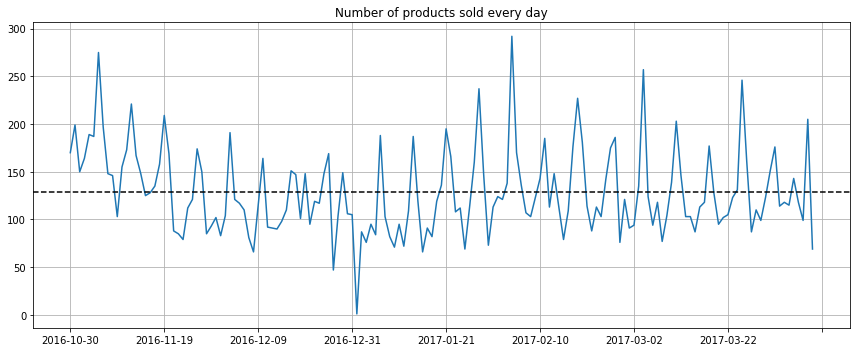

In [19]:
# plot of items sold per day
products_days = data["Date"].value_counts().sort_index().rename("Products sold")

mean = round(products_days.mean(),0)
maximum_day = products_days.index[products_days==products_days.max()][0]

ax = products_days.plot(figsize=(12,5), x_compat=True)

text1 = '$\mu=$' + str(mean)[:-2]
plt.grid(True)
plt.title("Number of products sold every day")
plt.axhline(mean, c="k", linestyle='--')
plt.tight_layout()

**INFERENCE**
> *This plot is showing number of products sold per day*

In [20]:
#Dividing the dataset into 4 sections based on the time factor(morning,afternoon,evening and night)
data.loc[(data['Time']<'12:00:00'),'Daytime']='Morning'
data.loc[(data['Time']>='12:00:00')&(data['Time']<'16:00:00'),'Daytime']='Afternoon'
data.loc[(data['Time']>='16:00:00')&(data['Time']<'18:00:00'),'Daytime']='Evening'
data.loc[(data['Time']>='18:00:00')&(data['Time']<'23:50:00'),'Daytime']='Night'

In [21]:
data.groupby('Daytime')['Item'].count().sort_values()

Daytime
Night          166
Evening       1711
Morning       8404
Afternoon    10226
Name: Item, dtype: int64

Text(0.5, 1.0, 'Business during the day')

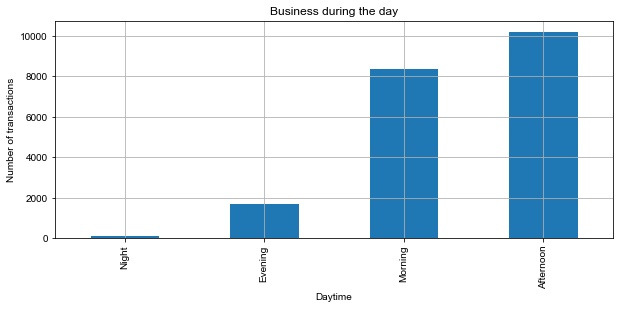

In [22]:
fig, ax=plt.subplots(figsize=(10,4))
sns.set_style('darkgrid')
data.groupby('Daytime')['Item'].count().sort_values().plot(kind='bar')
plt.ylabel('Number of transactions')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Business during the day')

**INFERENCE**
> *During its nearly 6 months in business, this bakery has sold over 11569 items during afternoon and only 14 items during night hours.*

## ASSOCIATION RULE MINING

### A.) Apriori  Algorithm

In [23]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [24]:
min_support = 0.03

In [25]:
metric = "lift"  # another usual metrics is confidence of the rule with at least 50%
min_threshold_for_metric = 1

In [26]:
number_rules_to_visualize = 5  # for the grouped bar chart

In [27]:
frequent_itemsets = apriori(basket_boolean_set, min_support=min_support, use_colnames=True)

print("\nFrequent itemsets using apriori and minimun support equals to %.2f percent" % (min_support*100))
frequent_itemsets.head(10)


Frequent itemsets using apriori and minimun support equals to 3.00 percent


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [28]:
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold_for_metric)

In [29]:
rules['antecedents'] = rules['antecedents'].apply(lambda frozen_set: str(set(frozen_set)))
rules['consequents'] = rules['consequents'].apply(lambda frozen_set: str(set(frozen_set)))
rules['support'] = rules['support'].apply(lambda value: round(value, 2))
rules['confidence'] = rules['confidence'].apply(lambda value: round(value, 2))
rules['lift'] = rules['lift'].apply(lambda value: round(value, 2))
rules['leverage'] = rules['leverage'].apply(lambda value: round(value, 2))
rules['conviction'] = rules['conviction'].apply(lambda value: round(value, 2))

In [30]:
pd.set_option('display.max_columns', 10)
print("Rules using the metric '%s' with a minimun threshold of %s equals to %.2f " % (metric, metric, min_threshold_for_metric))
rules

Rules using the metric 'lift' with a minimun threshold of lift equals to 1.00 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,{'Cake'},{'Coffee'},0.103856,0.478394,0.05,0.53,1.10,0.01,1.10
1,{'Coffee'},{'Cake'},0.478394,0.103856,0.05,0.11,1.10,0.01,1.01
2,{'Medialuna'},{'Coffee'},0.061807,0.478394,0.04,0.57,1.19,0.01,1.21
3,{'Coffee'},{'Medialuna'},0.478394,0.061807,0.04,0.07,1.19,0.01,1.01
4,{'Pastry'},{'Coffee'},0.086107,0.478394,0.05,0.55,1.15,0.01,1.16
5,{'Coffee'},{'Pastry'},0.478394,0.086107,0.05,0.10,1.15,0.01,1.01
6,{'Coffee'},{'Sandwich'},0.478394,0.071844,0.04,0.08,1.11,0.00,1.01
7,{'Sandwich'},{'Coffee'},0.071844,0.478394,0.04,0.53,1.11,0.00,1.12


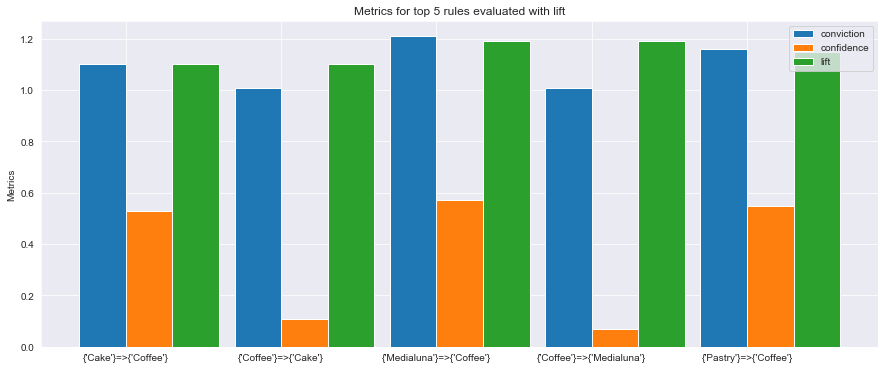

In [31]:
rules_top = rules.iloc[0:number_rules_to_visualize, :]
labels = ["=>".join(rule) for rule in rules_top.iloc[:, 0:2].values]  # format {set1} => {set2} for labels
x = np.arange(len(labels))  # the label locations
width = 0.3
fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width/2, rules_top['conviction'].values, width, label='conviction')
rects2 = ax.bar(x + width/2, rules_top['confidence'].values, width, label='confidence')
rects3 = ax.bar(x + width*1.5, rules_top['lift'].values, width, label='lift')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Metrics for top ' + str(number_rules_to_visualize) + ' rules evaluated with ' + metric)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


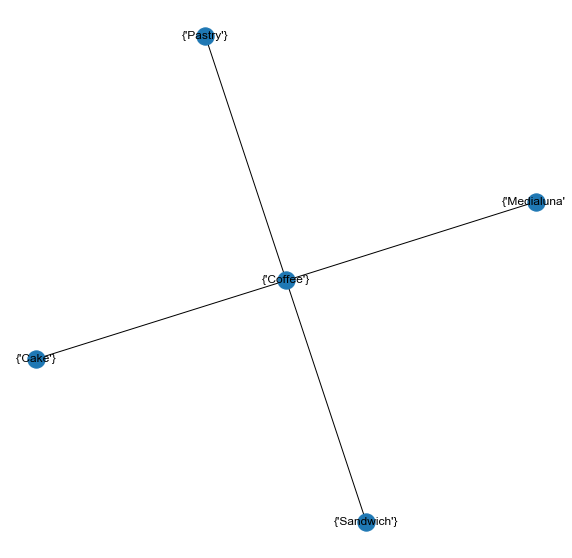

In [32]:
fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [63]:
%%time

Wall time: 8.03 ms


### Taking support value as 0.02:

In [34]:
min_support = 0.02

In [35]:
metric = "lift"  # another usual metrics is confidence of the rule with at least 50%
min_threshold_for_metric = 0.5

In [36]:
frequent_itemsets = apriori(basket_boolean_set, min_support=min_support, use_colnames=True)

print("\nFrequent itemsets using apriori and minimun support equals to %.2f percent" % (min_support*100))
frequent_itemsets.head(10)


Frequent itemsets using apriori and minimun support equals to 2.00 percent


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [37]:
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold_for_metric)

In [38]:
rules['antecedents'] = rules['antecedents'].apply(lambda frozen_set: str(set(frozen_set)))
rules['consequents'] = rules['consequents'].apply(lambda frozen_set: str(set(frozen_set)))
rules['support'] = rules['support'].apply(lambda value: round(value, 2))
rules['confidence'] = rules['confidence'].apply(lambda value: round(value, 2))
rules['lift'] = rules['lift'].apply(lambda value: round(value, 2))
rules['leverage'] = rules['leverage'].apply(lambda value: round(value, 2))
rules['conviction'] = rules['conviction'].apply(lambda value: round(value, 2))

In [39]:
pd.set_option('display.max_columns', 10)
print("Rules using the metric '%s' with a minimun threshold of %s equals to %.2f " % (metric, metric, min_threshold_for_metric))
rules

Rules using the metric 'lift' with a minimun threshold of lift equals to 0.50 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,{'Cake'},{'Bread'},0.103856,0.327205,0.02,0.22,0.69,-0.01,0.87
1,{'Bread'},{'Cake'},0.327205,0.103856,0.02,0.07,0.69,-0.01,0.97
2,{'Coffee'},{'Bread'},0.478394,0.327205,0.09,0.19,0.58,-0.07,0.83
3,{'Bread'},{'Coffee'},0.327205,0.478394,0.09,0.28,0.58,-0.07,0.72
4,{'Pastry'},{'Bread'},0.086107,0.327205,0.03,0.34,1.03,0.00,1.02
5,{'Bread'},{'Pastry'},0.327205,0.086107,0.03,0.09,1.03,0.00,1.00
6,{'Bread'},{'Tea'},0.327205,0.142631,0.03,0.09,0.60,-0.02,0.94
7,{'Tea'},{'Bread'},0.142631,0.327205,0.03,0.20,0.60,-0.02,0.84
8,{'Cake'},{'Coffee'},0.103856,0.478394,0.05,0.53,1.10,0.01,1.10
9,{'Coffee'},{'Cake'},0.478394,0.103856,0.05,0.11,1.10,0.01,1.01


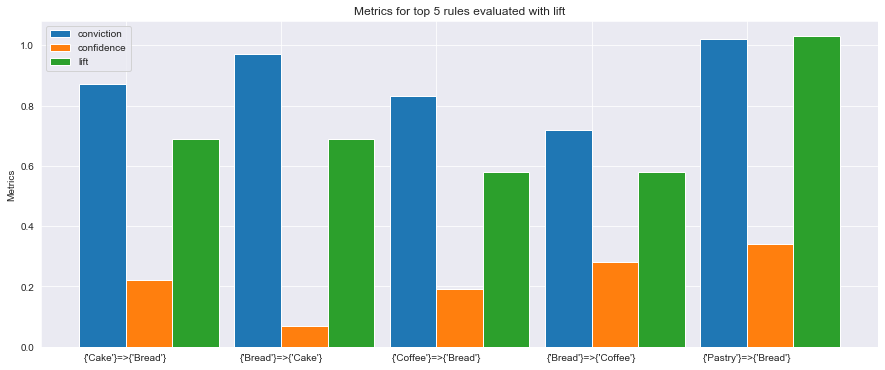

In [40]:
rules_top = rules.iloc[0:number_rules_to_visualize, :]
labels = ["=>".join(rule) for rule in rules_top.iloc[:, 0:2].values]  # format {set1} => {set2} for labels
x = np.arange(len(labels))  # the label locations
width = 0.3
fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width/2, rules_top['conviction'].values, width, label='conviction')
rects2 = ax.bar(x + width/2, rules_top['confidence'].values, width, label='confidence')
rects3 = ax.bar(x + width*1.5, rules_top['lift'].values, width, label='lift')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Metrics for top ' + str(number_rules_to_visualize) + ' rules evaluated with ' + metric)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


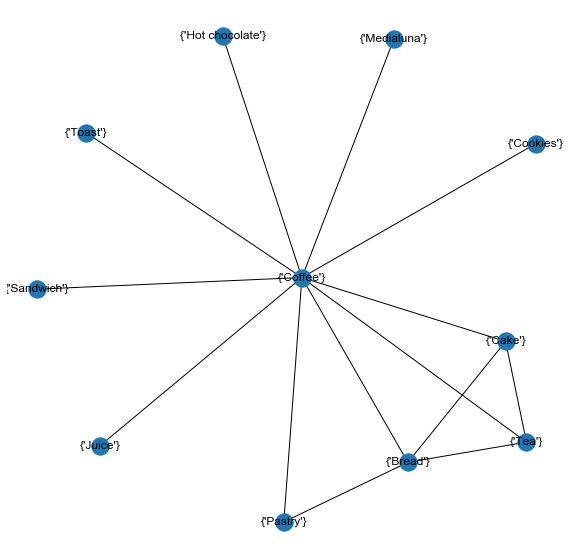

In [41]:
fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [70]:
%%time

Wall time: 8.04 ms


### B.) FP Growth  Algorithm

In [43]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(basket_boolean_set, min_support=0.03)

,support,itemsets
0,0.327205,(11)
1,0.058320,(48)
2,0.054411,(26)
3,0.038457,(60)
4,0.478394,(23)
5,0.086107,(65)
6,0.061807,(55)
7,0.142631,(83)
8,0.039197,(37)
9,0.038563,(51)


In [44]:
i_sets=fpgrowth(basket_boolean_set, min_support=0.03, use_colnames=True)
i_sets

,support,itemsets
0,0.327205,(Bread)
1,0.058320,(Hot chocolate)
2,0.054411,(Cookies)
3,0.038457,(Muffin)
4,0.478394,(Coffee)
5,0.086107,(Pastry)
6,0.061807,(Medialuna)
7,0.142631,(Tea)
8,0.039197,(Farm House)
9,0.038563,(Juice)


In [45]:
ruless = association_rules(i_sets, metric="confidence", min_threshold=0.1)
ruless

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
1,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
2,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
3,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
4,(Coffee),(Tea),0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142
5,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384


In [102]:
%%time

Wall time: 138 µs


### Taking support value as 0.02:

In [47]:
fpgrowth(basket_boolean_set, min_support=0.02)

,support,itemsets
0,0.327205,(11)
1,0.029054,(74)
2,0.058320,(48)
3,0.054411,(26)
4,0.038457,(60)
5,0.478394,(23)
6,0.086107,(65)
7,0.061807,(55)
8,0.142631,(83)
9,0.039197,(37)


In [48]:
i_sets=fpgrowth(basket_boolean_set, min_support=0.02, use_colnames=True)
i_sets

,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.038457,(Muffin)
5,0.478394,(Coffee)
6,0.086107,(Pastry)
7,0.061807,(Medialuna)
8,0.142631,(Tea)
9,0.039197,(Farm House)


In [49]:
ruless = association_rules(i_sets, metric="confidence", min_threshold=0.5)
ruless

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
1,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
2,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
3,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
5,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
6,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


In [124]:
%%time

Wall time: 7.98 ms


## ECLAT

In [144]:
items=frequent_itemsets['itemsets']

In [145]:
# Putting all transactions in a single list
ite = []
for i in range(0, len(frequent_itemsets)):
    ite.extend(items[i])

# Finding unique items from transactions and removing nan
uniqueItems = list(set(ite))

In [146]:
uniqueItems

['Muffin',
 'Alfajores',
 'Scone',
 'Scandinavian',
 'Coffee',
 'Sandwich',
 'Brownie',
 'Bread',
 'Pastry',
 'Farm House',
 'Tea',
 'Cake',
 'Juice',
 'Hot chocolate',
 'Truffles',
 'Medialuna',
 'Toast',
 'Soup',
 'Cookies']

In [147]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1;      

In [148]:
pair

[['Muffin', 'Alfajores'],
 ['Muffin', 'Scone'],
 ['Muffin', 'Scandinavian'],
 ['Muffin', 'Coffee'],
 ['Muffin', 'Sandwich'],
 ['Muffin', 'Brownie'],
 ['Muffin', 'Bread'],
 ['Muffin', 'Pastry'],
 ['Muffin', 'Farm House'],
 ['Muffin', 'Tea'],
 ['Muffin', 'Cake'],
 ['Muffin', 'Juice'],
 ['Muffin', 'Hot chocolate'],
 ['Muffin', 'Truffles'],
 ['Muffin', 'Medialuna'],
 ['Muffin', 'Toast'],
 ['Muffin', 'Soup'],
 ['Muffin', 'Cookies'],
 ['Alfajores', 'Scone'],
 ['Alfajores', 'Scandinavian'],
 ['Alfajores', 'Coffee'],
 ['Alfajores', 'Sandwich'],
 ['Alfajores', 'Brownie'],
 ['Alfajores', 'Bread'],
 ['Alfajores', 'Pastry'],
 ['Alfajores', 'Farm House'],
 ['Alfajores', 'Tea'],
 ['Alfajores', 'Cake'],
 ['Alfajores', 'Juice'],
 ['Alfajores', 'Hot chocolate'],
 ['Alfajores', 'Truffles'],
 ['Alfajores', 'Medialuna'],
 ['Alfajores', 'Toast'],
 ['Alfajores', 'Soup'],
 ['Alfajores', 'Cookies'],
 ['Scone', 'Scandinavian'],
 ['Scone', 'Coffee'],
 ['Scone', 'Sandwich'],
 ['Scone', 'Brownie'],
 ['Scone', 'Br

In [149]:
%%time
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in items if ' + ' and '.join(cond) + ']')
    score.append(len(eval(mycode))/21293.)

Wall time: 12 ms


In [150]:
ranking_ECLAT = pd.DataFrame([pair, score]).transpose()
ranking_ECLAT.columns = ['Pair', 'Score']

In [151]:
ranking_ECLAT.sort_values('Score', ascending=False).head(1000)

,Pair,Score
68,"[Coffee, Bread]",0.000469704
79,"[Coffee, Cookies]",0.000469704
107,"[Bread, Tea]",0.000469704
66,"[Coffee, Sandwich]",0.000469704
105,"[Bread, Pastry]",0.000469704
...,...,...
55,"[Scandinavian, Pastry]",0
56,"[Scandinavian, Farm House]",0
57,"[Scandinavian, Tea]",0
58,"[Scandinavian, Cake]",0


In [152]:
# Creating trios
trio = []
for j in range(0, len(uniqueItems)):
    for k in range(j, len(uniqueItems)):
        for l in range(k, len(uniqueItems)):
            if (k != j) and (j != l) and (k != l):
                try:
                    trio.append([uniqueItems[j], uniqueItems[j+k], uniqueItems[j+l]])
                except IndexError:
                    pass 

In [153]:
trio[:5]

[['Muffin', 'Alfajores', 'Scone'],
 ['Muffin', 'Alfajores', 'Scandinavian'],
 ['Muffin', 'Alfajores', 'Coffee'],
 ['Muffin', 'Alfajores', 'Sandwich'],
 ['Muffin', 'Alfajores', 'Brownie']]

In [158]:
%%time
score = []
for i in trio:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in items if ' + ' and '.join(cond) + ']')
    #mycode = "print 'hello world'"
    score.append(len(eval(mycode))/21293.)

Wall time: 6.9 ms


In [157]:
ranking_ECLAT_trio = pd.DataFrame([trio, score]).transpose()
ranking_ECLAT_trio.columns = ['Trio', 'Score']
ranking_ECLAT_trio.sort_values('Score', ascending=False).head(10)

,Trio,Score
0,"[Muffin, Alfajores, Scone]",0
361,"[Scone, Toast, Soup]",0
359,"[Scone, Medialuna, Soup]",0
358,"[Scone, Medialuna, Toast]",0
357,"[Scone, Truffles, Cookies]",0
356,"[Scone, Truffles, Soup]",0
355,"[Scone, Truffles, Toast]",0
354,"[Scone, Truffles, Medialuna]",0
353,"[Scone, Hot chocolate, Cookies]",0
352,"[Scone, Hot chocolate, Soup]",0


## ANALYSIS :

### FP Growth algorithm took less time as compared to Apriori algorithm so it seems to be more efficient.

>> **The number of itemsets we get taking support as 0.02 are much more as compared when support is 0.03 which seemed to be less eficient.** 

**Also when the value of support was taken as 0.02, the time of execution is more in both apriori and FP Growth compared to the situation when the support is 0.03.**

| **Support** | **Execution Time for apriori** | **Execution Time for FP Growth** |
| :- | -: | :-: |
| 0.03 | 8.03 ms | 0.138 ms |
| 0.02 | 8.04 ms | 7.98  ms |

|**Execution Time for apriori** | **Execution Time for FP Growth** | **Execution Time for Eclat** |
| :- | -: | :-: |
| 8.03 ms | 0.138 ms | 6.9ms |



**The no of association rules formed when support is 0.02 is more than 3 times the no of rules formed when support is 0.03**

### Conclusion :
> *Coffee is the best selling item of this bakery and it shows association with 4 items- pastry, cake, medialuna and sandwich.* 


### Recommendations :
#### There are a couple of strategies that the bakery can adopt (if it isn't using them yet) to increase its sales considering the association we have seen between coffee and its 4 partners.

> *Promotional discount in either one of the 4 partners can excite customers to buy coffee (or the other way round, will also work).*

> *Placing these 4 items close to coffee ordering counter can be a good strategy to attract customers in buying these (which we see quite often to happen in many bakeries and coffee shops).*

> *Also some recipes like a coffee cake or coffee pastry can excite coffee and cake/pastry lovers*

## THANK YOU

In [141]:
%%time
print("saumya")

saumya
Wall time: 999 µs
